## Observations and Insights 

1. From the pie-chart comparing the distribution of female versus male mice we can see a fairly even balance of females (51%) and males (49%) from this data-set.

2. The line plot of mouse s185 from treatment Capomulin we can observe a decrease of tumor volume as the timepoint increases.

3. When observing the scatter plot of weight vs tumor volume we can see a positive correlation.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
Combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
mice = Combined_data["Mouse ID"].value_counts()
num_mice = len(mice)
num_mice

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mouse_id = pd.DataFrame(dup_mice)
all_dup_mouse_id


,0
0,g989


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice) == False]

In [15]:
# Checking the number of mice in the clean DataFrame.
mice = clean_df["Mouse ID"].value_counts()
num_mice = len(mice)
num_mice

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
sum_stats = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_variance, "Standard Deviation": drug_std, "SEM": drug_sem})
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_stats = clean_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Timepoints vs Drug Regimen')

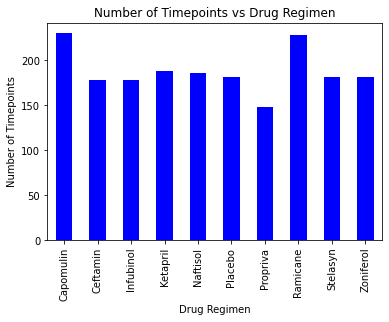

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data = clean_df.groupby('Drug Regimen').count()['Timepoint']
bar_pd = data.plot.bar(color='b')
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints vs Drug Regimen')


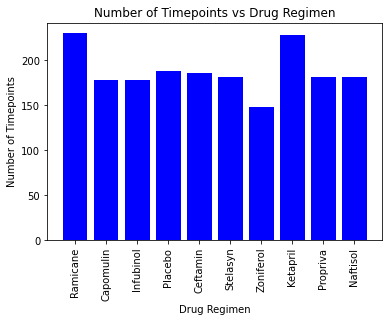

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y = data.tolist()
x = clean_df['Drug Regimen'].unique().tolist()

plt.bar(x, y, color='blue')
plt.xticks(rotation='vertical')
plt.title('Number of Timepoints vs Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

Text(0.5, 1.0, 'Female vs Male Mice')

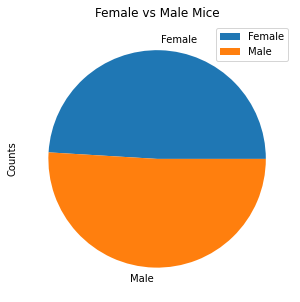

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)
gender_df = gender_df.rename(columns={'Mouse ID': 'Counts'})
gender_df.plot.pie(y='Counts', figsize=(5,5))
plt.title('Female vs Male Mice')

Text(0.5, 1.0, 'Female vs Male Mice')

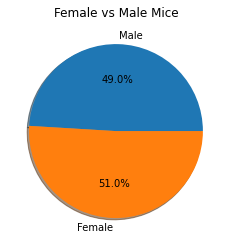

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df['Sex'].unique().tolist()
size = gender.tolist()
total = sum(size)
male_per = size[0] / total * 100
female_per = size[1] / total * 100
size = [male_per, female_per]
plt.pie(size, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Female vs Male Mice')

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")

In [43]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin_tum = Capomulin_merge["Tumor Volume (mm3)"]
Data.append(Capomulin_tum)
Ramicane_tum = Ramicane_merge["Tumor Volume (mm3)"]
Data.append(Ramicane_tum)
Infubinol_tum = Infubinol_merge["Tumor Volume (mm3)"]
Data.append(Infubinol_tum)
Ceftamin_tum = Ceftamin_merge["Tumor Volume (mm3)"]
Data.append(Ceftamin_tum)

# Determine outliers using upper and lower bounds
#Capomulin
ca_quartiles = Capomulin_tum.quantile([.25,.5,.75])
ca_lowerq = ca_quartiles[0.25]
ca_upperq = ca_quartiles[0.75]
ca_iqr = ca_upperq-ca_lowerq

ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)

#Ramicane
ra_quartiles = Ramicane_tum.quantile([.25,.5,.75])
ra_lowerq = ra_quartiles[0.25]
ra_upperq = ra_quartiles[0.75]
ra_iqr = ra_upperq-ra_lowerq

ra_lower_bound = ra_lowerq - (1.5*ra_iqr)
ra_upper_bound = ra_upperq + (1.5*ra_iqr)

#Ceftamin
c_quartiles = Ceftamin_tum.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

#Infubinol
i_quartiles =Infubinol_tum.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)

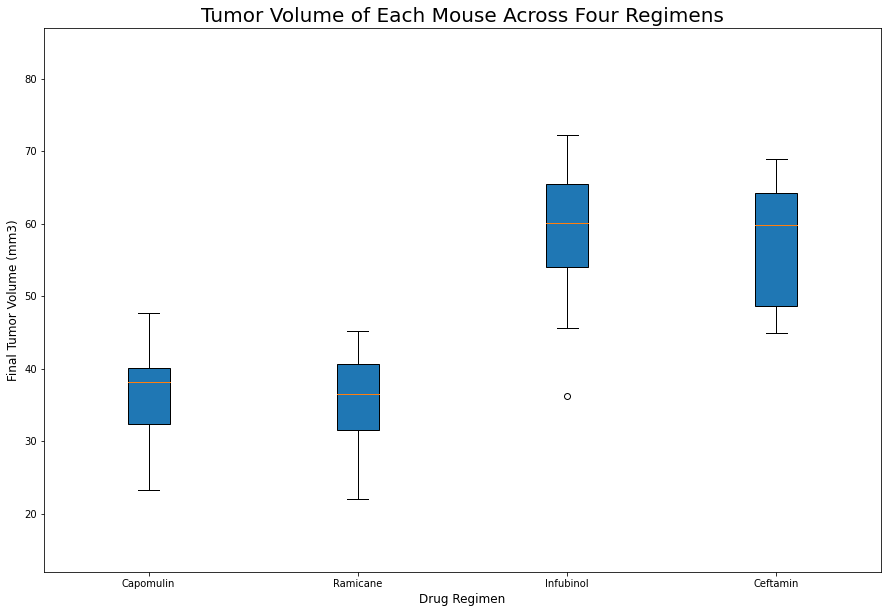

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume of Each Mouse Across Four Regimens',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(Data, labels=Treatments, widths = 0.2, patch_artist=True,vert=True)
plt.ylim(12, 87)
plt.show()


## Line and Scatter Plots

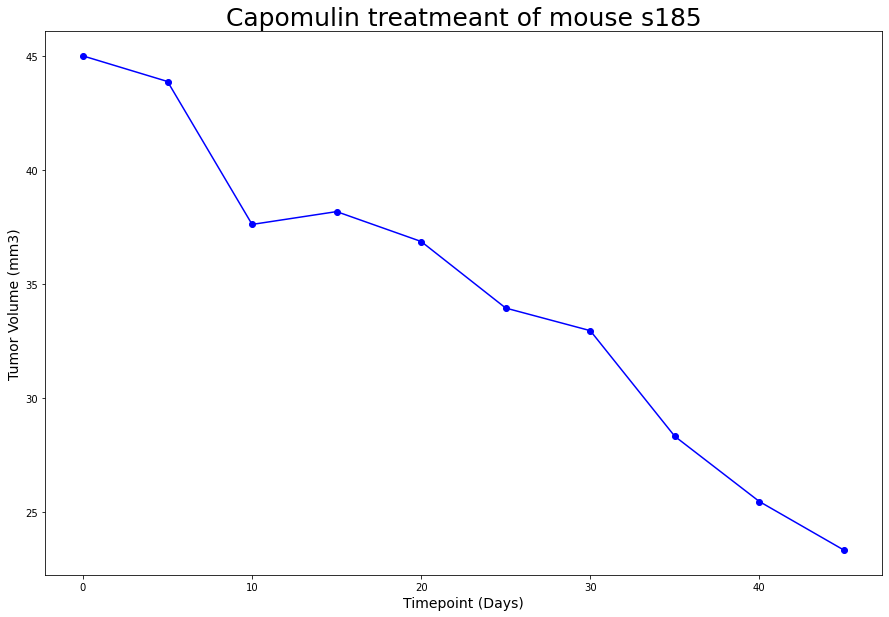

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df.head()
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185",:]
line_plot.head()

x = line_plot["Timepoint"]
y = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse s185',fontsize =25)
plt.plot(x, y, color="blue", marker="o")
plt.xlabel('Timepoint (Days)',fontsize = 14)
plt.ylabel('Tumor Volume (mm3)',fontsize = 14)
plt.show()

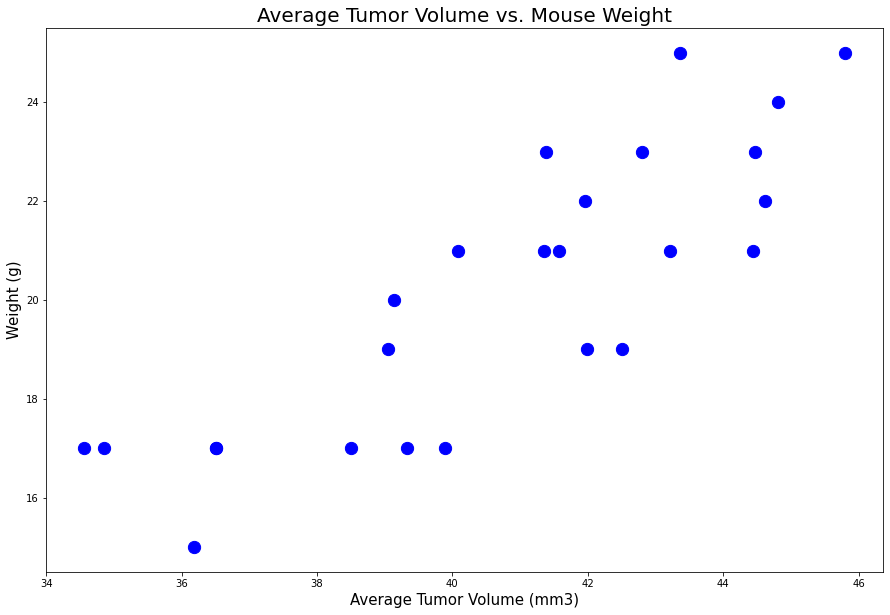

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_vol = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_vol['Tumor Volume (mm3)'],avg_vol['Weight (g)'], s=150, color="blue")
plt.title('Average Tumor Volume vs. Mouse Weight',fontsize =20)
plt.xlabel('Average Tumor Volume (mm3)',fontsize =15)
plt.ylabel('Weight (g)',fontsize =15)

plt.show()


## Correlation and Regression

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(avg_vol['Tumor Volume (mm3)'],avg_vol['Weight (g)'])[0],2)
corr

x = avg_vol['Tumor Volume (mm3)']
y = avg_vol['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation)


y = 0.74x + -10.15
